# From Biological to Artificial Neurons

## The Perceptron

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris(as_frame=True)
X=iris.data[["petal length (cm)", "petal width (cm)"]].values
y=(iris.target==0) #Iris Setosa

per_clf=Perceptron(random_state=42)
per_clf.fit(X,y)

X_new=np.array([[1,3],[2,0.4]])
y_pred=per_clf.predict(X_new)
y_pred

array([False,  True])

In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(loss="perceptron",penalty=None,learning_rate="constant",eta0=1,random_state=42)
sgd_clf.fit(X,y)
assert (sgd_clf.coef_==per_clf.coef_).all()
assert (sgd_clf.intercept_==per_clf.intercept_).all()

## Regression MLPs

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

housing=fetch_california_housing()
X_train_full,X_test,y_full_train,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_full_train,random_state=42)


mlp_reg=MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42)
model=make_pipeline(StandardScaler(),mlp_reg)
model.fit(X_train,y_train)
y_pred=model.predict(X_valid)
rmse=root_mean_squared_error(y_valid,y_pred)

In [8]:
rmse

0.5053326657968762

## Classification MLPs

In [10]:
from sklearn.neural_network import MLPClassifier

X_train_full,X_test,y_full_train,y_test=train_test_split(iris.data,iris.target,test_size=0.1,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_full_train,test_size=0.1,random_state=42)

mlp_clf=MLPClassifier(hidden_layer_sizes=[5],max_iter=10000,random_state=42)
model=make_pipeline(StandardScaler(),mlp_clf)
model.fit(X_train,y_train)
accuracy=model.score(X_valid,y_valid)
accuracy


1.0

# Implementing MLPs with Keras

## Building an Image Classifier Using the Sequential API

In [13]:
import tensorflow as tf

fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist

X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]

In [14]:
X_train.shape

(55000, 28, 28)

In [15]:
X_train.dtype

dtype('uint8')

In [16]:
X_train,X_valid,X_test=X_train/255.,X_valid/255.,X_test/255.

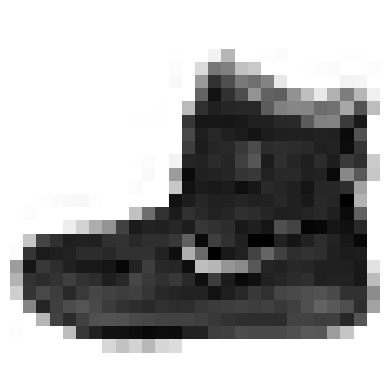

In [17]:
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")
plt.show()

In [18]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

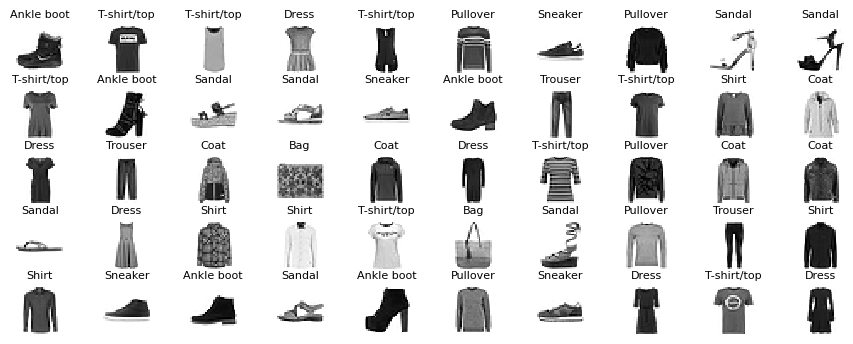

In [20]:
plt.figure(figsize=(11,4))
for idx,image_data in enumerate(X_train[:50]):
    plt.subplot(5,10,idx+1)
    plt.imshow(X_train[idx],cmap="binary",interpolation="nearest")
    plt.title(class_names[y_train[idx]],fontsize=8)
    plt.axis("off")
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

### Creating the model using Sequential API

In [22]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

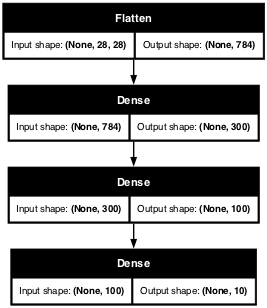

In [26]:
tf.keras.utils.plot_model(model,show_shapes=True,dpi=50)

In [27]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [28]:
hidden1=model.layers[1]

In [29]:
model.get_layer('dense') is hidden1

True

In [30]:
weights,biases=hidden1.get_weights()

In [31]:
weights

array([[ 0.04550938,  0.01559976,  0.03047282, ...,  0.07065931,
        -0.0596813 , -0.05630936],
       [ 0.0061064 ,  0.04655019, -0.03072136, ..., -0.05613922,
        -0.06867769, -0.06697769],
       [-0.02224293,  0.04893705, -0.00555778, ..., -0.04158562,
        -0.01103919, -0.01701254],
       ...,
       [ 0.01794436,  0.05805096, -0.05121513, ...,  0.06376936,
         0.04458947,  0.02357389],
       [ 0.05238779, -0.04466179,  0.03427936, ..., -0.07178387,
        -0.02954499,  0.07101312],
       [-0.05890099,  0.00649   ,  0.00097317, ..., -0.01041285,
         0.00590032, -0.00822513]], dtype=float32)

In [32]:
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

#### Compiling the Model

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])


In [37]:
#this cell is equivalent to above cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
             optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy]
             )

In [38]:
tf.keras.utils.to_categorical([2,5,6,3],num_classes=10)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [39]:
np.argmax([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],
        axis=1)

array([2, 5, 6, 3])

#### Training and evaluating the model

In [41]:
history=model.fit(X_train,y_train,epochs=30,
                 validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - loss: 0.9816 - sparse_categorical_accuracy: 0.6966 - val_loss: 0.5022 - val_sparse_categorical_accuracy: 0.8270
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - loss: 0.5058 - sparse_categorical_accuracy: 0.8270 - val_loss: 0.4516 - val_sparse_categorical_accuracy: 0.8394
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - loss: 0.4537 - sparse_categorical_accuracy: 0.8440 - val_loss: 0.4279 - val_sparse_categorical_accuracy: 0.8480
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - loss: 0.4237 - sparse_categorical_accuracy: 0.8532 - val_loss: 0.4117 - val_sparse_categorical_accuracy: 0.8518
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - loss: 0.4022 - sparse_categorical_accuracy: 0.8599 - val_loss: 0.3992 - val_sparse_categorical_accuracy: 0.8564
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - loss: 0.3852 - sparse_categorical_accuracy: 0.8669 - val_loss: 0.3903 - val_sparse_categoric

In [42]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [43]:
print(history.epoch) 


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [44]:
df=pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.709012,0.768291,0.502212,0.8270
1,0.487005,0.832000,0.451571,0.8394
2,0.442642,0.846909,0.427855,0.8480
3,0.415355,0.855364,0.411713,0.8518
4,0.395466,0.861800,0.399189,0.8564


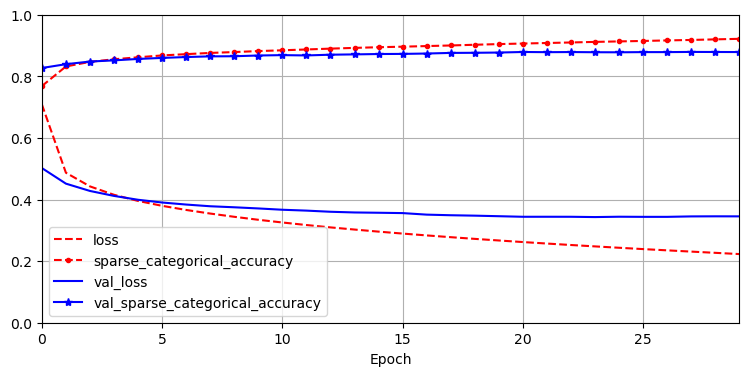

In [45]:
df.plot(figsize=(9,4),xlim=[0,29],ylim=[0,1],grid=True,xlabel="Epoch",style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [46]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.3638 - sparse_categorical_accuracy: 0.8748


[0.36227938532829285, 0.8747000098228455]

#### Using Model to make prediction

In [48]:
X_new=X_test[:5]
y_proba=model.predict(X_new)
y_proba.round(2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.01, 0.  , 0.87],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.24, 0.  , 0.03, 0.  , 0.  , 0.  , 0.73, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [49]:
y_pred=y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6])

In [50]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [51]:
y_new=y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

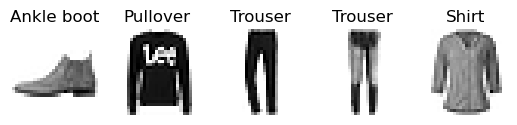

In [52]:
for idx,image in enumerate(X_new):
    plt.subplot(1,5,idx+1)
    plt.imshow(image,cmap="binary",interpolation="nearest")
    plt.title(class_names[y_test[idx]])
    plt.axis("off")
    

## Building a Regression MLP Using Sequential API

In [54]:
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)
print(len(X_train),len(y_train))
print(len(X_valid),len(y_valid))
print(len(X_test),len(y_test))

11610 11610
3870 3870
5160 5160


In [55]:
X_train.shape

(11610, 8)

In [56]:
X_train.shape[1:]

(8,)

In [57]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=X_train.shape[1:]),
    tf.keras.layers.Normalization(name="normalization"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

norm_layer=model.get_layer("normalization")
norm_layer.adapt(X_train)
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])
history=model.fit(X_train,y_train,epochs=20,
                 validation_data=(X_valid,y_valid))
mse_test,rmse_test=model.evaluate(X_test,y_test)
X_new=X_test[:4]
y_pred=model.predict(X_new)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - RootMeanSquaredError: 1.2943 - loss: 1.7920 - val_RootMeanSquaredError: 0.7597 - val_loss: 0.5772
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - RootMeanSquaredError: 0.6529 - loss: 0.4268 - val_RootMeanSquaredError: 0.6069 - val_loss: 0.3683
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - RootMeanSquaredError: 0.6166 - loss: 0.3804 - val_RootMeanSquaredError: 0.5957 - val_loss: 0.3548
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - RootMeanSquaredError: 0.5995 - loss: 0.3597 - val_RootMeanSquaredError: 0.5742 - val_loss: 0.3297
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - RootMeanSquaredError: 0.5894 - loss: 0.3476 - val_RootMeanSquaredError: 0.6790 - val_loss: 0.4610
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - RootMeanSquaredError: 0.5810 - loss: 0.3378 - val_RootMeanSquaredError: 0.7572 - val_loss: 0.5734
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - RootMeanSquaredError

In [58]:
rmse_test

0.5384350419044495

In [59]:
y_pred

array([[0.44317377],
       [1.0241805 ],
       [5.0437026 ],
       [2.3651695 ]], dtype=float32)

In [60]:
y_test[:4]

array([0.477  , 0.458  , 5.00001, 2.186  ])

## Building Complex Models Using Functional API

In [62]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [63]:
normalized_layer=tf.keras.layers.Normalization()
normalized_layer.adapt(X_train)
hidden_layer1=tf.keras.layers.Dense(30,activation="relu")
hidden_layer2=tf.keras.layers.Dense(30,activation="relu")
concat_layer=tf.keras.layers.Concatenate()
output_layer=tf.keras.layers.Dense(1)

input_=tf.keras.layers.Input(shape=X_train.shape[1:])
normalized=normalized_layer(input_)
hidden1=hidden_layer1(normalized)
hidden2=hidden_layer2(hidden1)
concat=concat_layer([normalized,hidden2])
output=output_layer(concat)

model=tf.keras.Model(inputs=[input_],outputs=[output])


In [64]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [65]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])

history=model.fit(X_train,y_train,epochs=20,
                 validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)
y_pred=model.predict(X_new)

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - RootMeanSquaredError: 1.2862 - loss: 1.7308 - val_RootMeanSquaredError: 1.9222 - val_loss: 3.6947
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - RootMeanSquaredError: 0.6979 - loss: 0.4884 - val_RootMeanSquaredError: 1.2253 - val_loss: 1.5014
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - RootMeanSquaredError: 0.6385 - loss: 0.4080 - val_RootMeanSquaredError: 0.8375 - val_loss: 0.7014
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - RootMeanSquaredError: 0.6213 - loss: 0.3864 - val_RootMeanSquaredError: 0.7051 - val_loss: 0.4971
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - RootMeanSquaredError: 0.6121 - loss: 0.3750 - val_RootMeanSquaredError: 0.6618 - val_loss: 0.4380
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - RootMeanSquaredError: 0.6044 - loss: 0.3656 - val_RootMeanSquaredError: 0.6516 - val_loss: 0.4246
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - RootMeanSquaredError: 0.5966 - 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(4, 8))
  warnings.warn(msg)


In [152]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)


In [154]:
input_wide=tf.keras.layers.Input(shape=[5],name="wide_input")
input_deep=tf.keras.layers.Input(shape=[6],name="deep_input")
norm_layer_wide=tf.keras.layers.Normalization(name="wide_norm")
norm_layer_deep=tf.keras.layers.Normalization(name="deep_norm")

norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)
hidden1=tf.keras.layers.Dense(30,activation="relu",name="hidden1")(norm_deep)
hidden2=tf.keras.layers.Dense(30,activation="relu",name="hidden2")(hidden1)
concat=tf.keras.layers.concatenate([norm_wide,hidden2],name="concat_layer")
output=tf.keras.layers.Dense(1,name="output")(concat)
model=tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output],name="wide_deep_output")

In [156]:
model.summary()

Model: "wide_deep_output"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_norm           │ (None, 6)         │         13 │ deep_input[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden1 (Dense)     │ (None, 30)        │        210 │ deep_norm[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_norm           │ (None, 5)         │         11 │ wide_input[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden2 (Dense)     │ (None, 30)        │        930 │ hidden1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, 35)        │          0 │ wide_norm[0][0],  │
│ (Concatenate)       │                   │            │ hidden2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         36 │ concat_layer[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [136]:
X_train.shape

(11610, 8)

In [138]:
X_train_wide,X_train_deep=X_train[:,:5],X_train[:,2:]

In [140]:
X_train_wide.shape

(11610, 5)

In [142]:
X_train_deep.shape

(11610, 6)

In [160]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])

X_train_wide,X_train_deep=X_train[:,:5],X_train[:,2:]
X_valid_wide,X_valid_deep=X_valid[:,:5],X_valid[:,2:]
X_test_wide,X_test_deep=X_test[:,:5],X_test[:,2:]
X_new_wide,X_new_deep=X_test_wide[:3],X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history=model.fit((X_train_wide,X_train_deep),y_train,epochs=20,
                 validation_data=((X_valid_wide,X_valid_deep),y_valid))
mse=model.evaluate((X_test_wide,X_test_deep),y_test)
y_pred=model.predict((X_new_wide,X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - RootMeanSquaredError: 0.5926 - loss: 0.3513 - val_RootMeanSquaredError: 0.8616 - val_loss: 0.7424
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - RootMeanSquaredError: 0.5870 - loss: 0.3446 - val_RootMeanSquaredError: 0.5698 - val_loss: 0.3247
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - RootMeanSquaredError: 0.5793 - loss: 0.3356 - val_RootMeanSquaredError: 0.6851 - val_loss: 0.4694
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - RootMeanSquaredError: 0.5792 - loss: 0.3356 - val_RootMeanSquaredError: 0.6404 - val_loss: 0.4101
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - RootMeanSquaredError: 0.5755 - loss: 0.3313 - val_RootMeanSquaredError: 1.2147 - val_loss: 1.4756
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - RootMeanSquaredError: 0.5767 - loss: 0.3326 - val_RootMeanSquaredError: 0.8526 - val_loss: 0.7269
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - RootMeanSquaredError